# BikeSharing
Bike Sharing (Boom Bike) Data Analysis

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

In [316]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [317]:
df = pd.read_csv("day.csv")

In [318]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## EDA Analysis

In [319]:
def getSeason(x):
    
    '''
    Util method to convert given numeric season to categorical values
    input: Season integer value
    return: Catagorical value as per data dictionary.
    '''
    #season: (1:spring, 2:summer, 3:fall, 4:winter)
    if x == 1:
        return "spring"
    elif x == 2:
        return "summer"
    elif x == 3:
        return "fall"
    elif x == 4:
        return "winter"
    return "None"

In [320]:
df['season'] = df['season'].apply(getSeason)

In [321]:
def get_weathersit(x):
    '''
    Util method to convert given numberic weathersit value to categorical value.
    input: weathersit numberic value.
    return: Categorical value as per data dictionary (only 1-2 word are taken)
    '''
    # 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    # 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    # 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    # 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    if x == 1:
        return "Clear"
    elif x == 2:
        return "Mist"
    elif x == 3:
        return "Light Snow"
    elif x == 4:
        return "Heavy Rain"
    return "None"

In [322]:
df['weathersit'] = df['weathersit'].apply(get_weathersit)

In [323]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [324]:
# Convert month in numbers to strings, after initial model it was found that mnth can be important.
df['mnth'] = df['mnth'].map({1: 'Jan', 
                             2: 'Feb', 
                             3: 'March', 
                             4: 'April', 
                             5: 'May', 
                             6: 'June', 
                             7: 'July', 
                             8: 'Aug', 
                             9: 'Sept', 
                             10: 'Oct', 
                             11: 'Nov', 
                             12: 'Dec'})

In [325]:
# As per data given, 0,6 are set as zero (weekend/holiday) in workingday.
df['weekday'] = df['weekday'].map({0: 'Sunday',
                                   1: 'Monday', 
                                   2: 'Tuesday', 
                                   3: 'Wednusday', 
                                   4: 'Thursday', 
                                   5: 'Friday', 
                                   6: 'Saturday'})

In [326]:
# As per data dictionary, cnt = "count of total rental bikes including both casual and registered", 
# so doing analysis on this is not required.
df.drop(['casual','registered'], axis = 1, inplace = True)

In [327]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,Jan,0,Wednusday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [328]:
## Number of empty rows
df.isna().all(axis=1).sum()

0

In [329]:
## Number of columns with NA
df.isna().all(axis=0).sum()

0

In [330]:
df.drop_duplicates(inplace=True)

In [331]:
df.shape

(730, 14)

### Check for outliers

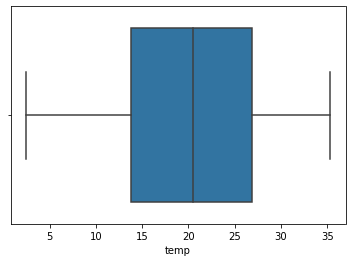

In [332]:
sbn.boxplot(df['temp'])
plt.show()

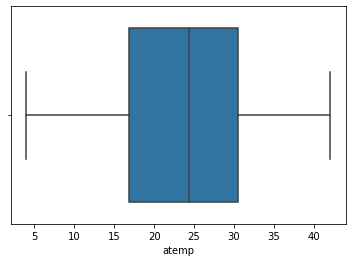

In [333]:
sbn.boxplot(df['atemp'])
plt.show()

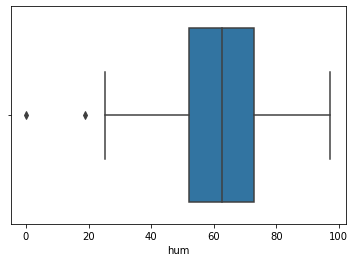

In [334]:
sbn.boxplot(df['hum'])
plt.show()

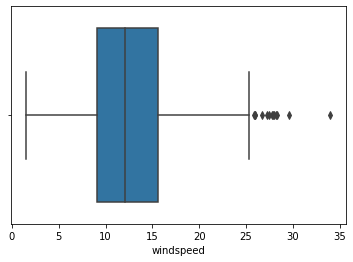

In [335]:
sbn.boxplot(df['windspeed'])
plt.show()

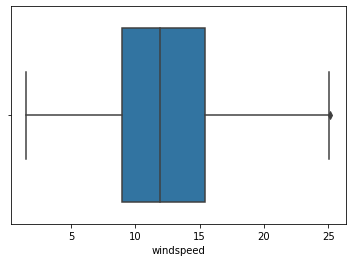

In [336]:
sbn.boxplot(df[df['windspeed'] < df['windspeed'].quantile(0.98)]['windspeed'])
plt.show()

In [337]:
# Observation: With 0.98 percentile, box plot is looking good after all outline removal.
# need to make sure, date set to have value less than 0.98 percentile.
df = df[df['windspeed'] < df['windspeed'].quantile(0.98)]

In [338]:
def draw_barplot(xAxis, yAxis):
    
    '''
    Util method to plot barplot
    input: X and Y axis column name
    output: Plot
    return: None
    '''
    plt.figure(figsize=(15,7))
    plt.ylabel(yAxis,fontsize=14,color='w')
    plt.xlabel(xAxis,fontsize=14,color = 'w')      
    plt.title("Barplot: {0} vs {1}".format(xAxis, yAxis),fontsize=14)
    sbn.barplot(data=df, x=xAxis, y=yAxis, orient='v')
    plt.show()

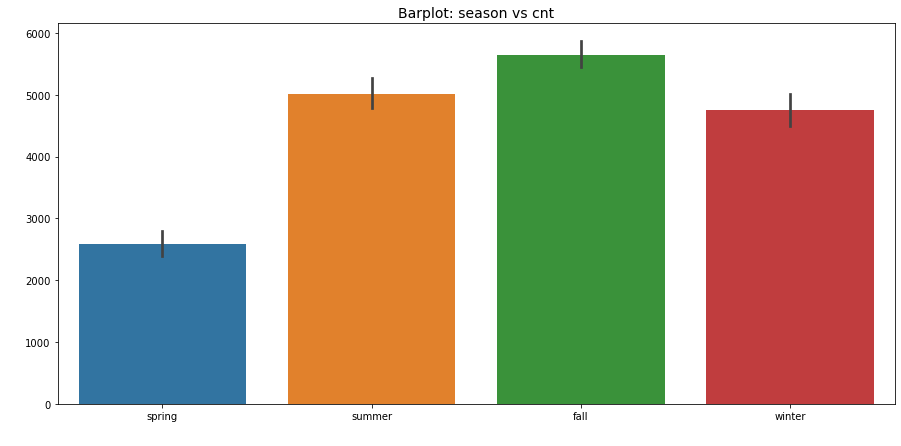

In [339]:
draw_barplot(xAxis='season', yAxis='cnt')

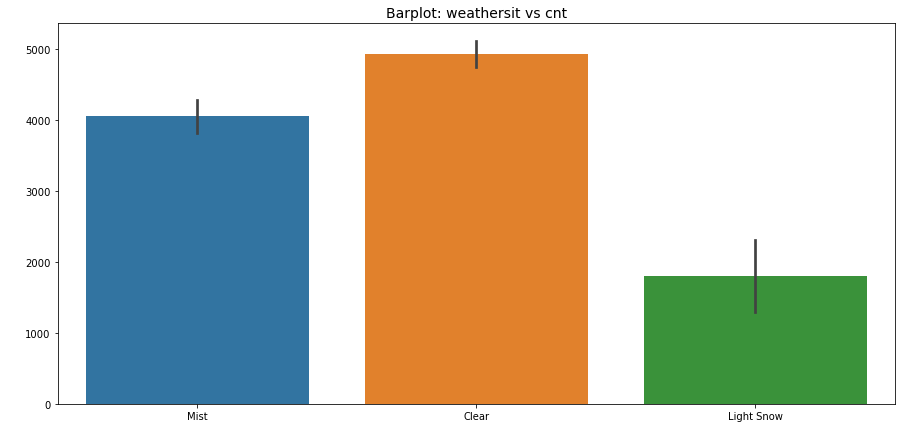

In [340]:
draw_barplot(xAxis='weathersit', yAxis='cnt')

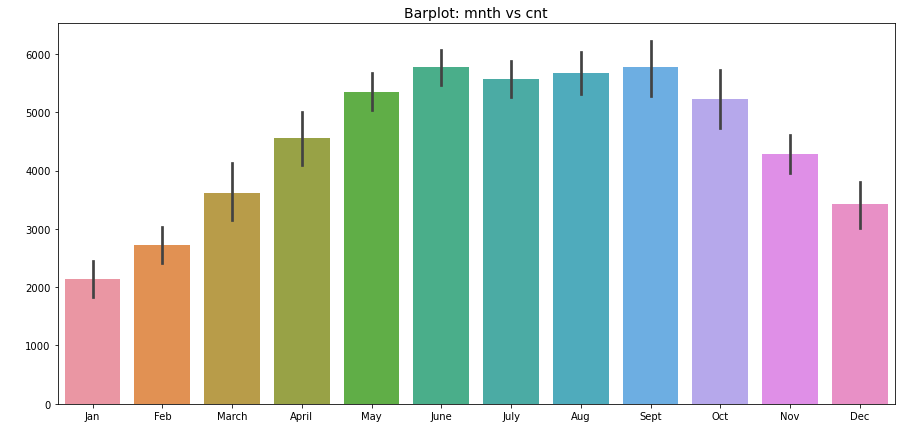

In [341]:
draw_barplot(xAxis='mnth', yAxis='cnt')

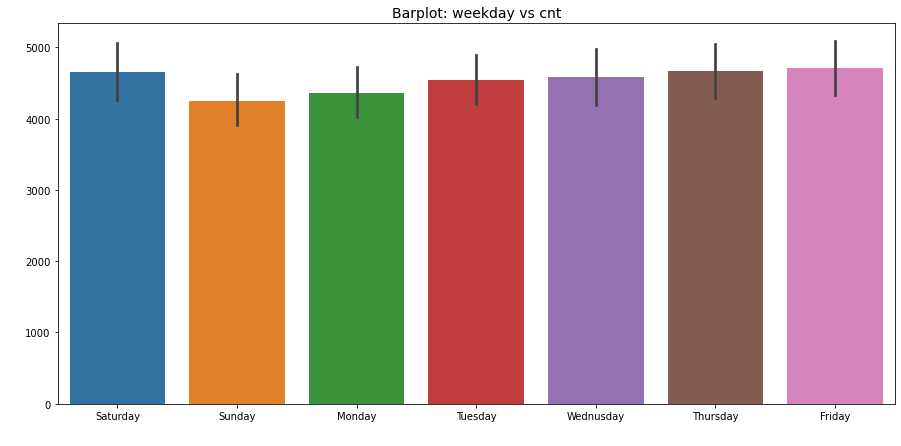

In [342]:
draw_barplot(xAxis='weekday', yAxis='cnt')

### Observation on Catagorical Data
1. Summer and Fall are the best season for Bike Service
2. Months from May to Oct are good for Bike Service
3. People like to use Bike more on Weekdays.

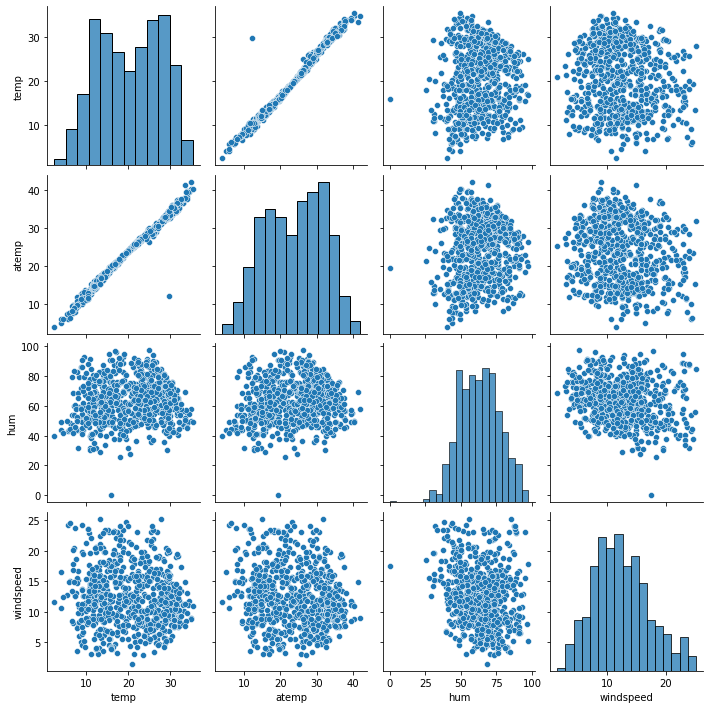

In [343]:
sbn.pairplot(df[['temp', 'atemp','hum','windspeed']])
plt.show()

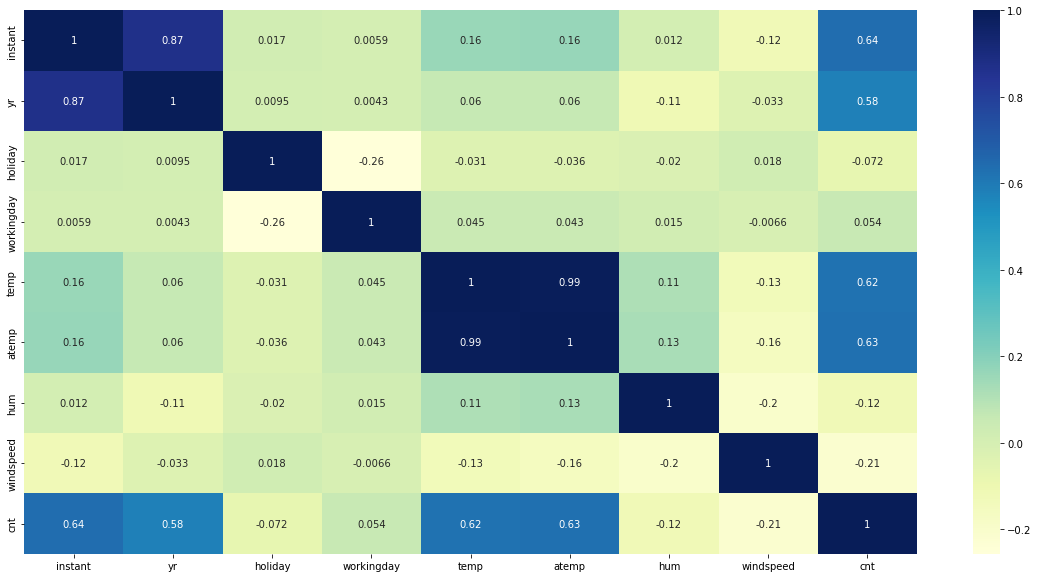

In [344]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Observation on Numrical Data
1. Features "temp" and "atemp" are highly co-related, one can be ignored while creating model
2. Features "yr", "temp", "atemp" are highly co-related to "cnt" feature.
3. Features "holiday", "hum", "windspeed" are negatively co-related to "cnt".

## Linear Regression Steps

### Step 1: Dummy Variables creation

In [345]:
def create_dummies(df, column_name):
    status = pd.get_dummies(df[column_name], drop_first = True)
    df = pd.concat([df, status], axis = 1)
    return df

In [346]:
df = create_dummies(df, column_name='weathersit')

In [347]:
df = create_dummies(df, column_name='season')

In [348]:
df = create_dummies(df, column_name='mnth')

In [349]:
df = create_dummies(df, column_name='weekday')

In [350]:
## Drop catagorical colums
df.drop(['season', 'weathersit', 'mnth', 'weekday', 'dteday', 'instant'], axis = 1, inplace = True)

In [351]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow,Mist,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednusday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


In [352]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [353]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow,Mist,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednusday
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,0,0,0,0,0,1,0,0,0
559,1,0,0,28.836653,33.30210,69.9167,9.626493,6969,0,1,...,0,0,0,0,0,1,0,0,0,0
115,0,0,1,25.898347,29.70415,72.9167,21.875500,4400,0,0,...,0,0,0,0,0,0,0,0,1,0
581,1,0,0,31.535847,36.55395,65.2500,19.458207,5464,0,0,...,0,0,0,0,0,0,1,0,0,0
494,1,0,1,20.739153,24.58915,55.2083,21.042221,6572,0,0,...,1,0,0,0,0,0,0,1,0,0


### Step 2: Scale features before applying linear regression

In [354]:
scaler = MinMaxScaler()

In [355]:
num_vars = ["temp", "atemp", "hum", "windspeed"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow,Mist,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednusday
728,1,0,0,0.245101,0.210280,0.497001,0.929611,1796,0,0,...,0,0,0,0,0,0,1,0,0,0
559,1,0,0,0.802708,0.808676,0.718938,0.343371,6969,0,1,...,0,0,0,0,0,1,0,0,0,0
115,0,0,1,0.713409,0.709538,0.749786,0.860947,4400,0,0,...,0,0,0,0,0,0,0,0,1,0
581,1,0,0,0.884740,0.898278,0.670951,0.758805,5464,0,0,...,0,0,0,0,0,0,1,0,0,0
494,1,0,1,0.556613,0.568598,0.567695,0.825737,6572,0,0,...,1,0,0,0,0,0,0,1,0,0


In [356]:
y_train = df_train.pop('cnt')
X_train = df_train

In [357]:
X_train.shape

(500, 29)

### Step 3: Train model

In [358]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with all features
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [359]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light Snow', True, 1),
 ('Mist', False, 2),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', False, 15),
 ('Jan', True, 1),
 ('July', False, 14),
 ('June', False, 9),
 ('March', False, 7),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 6),
 ('Sept', True, 1),
 ('Monday', False, 11),
 ('Saturday', False, 3),
 ('Sunday', False, 10),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednusday', False, 16)]

In [360]:
# features with support true
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Light Snow',
       'spring', 'winter', 'Dec', 'Jan', 'May', 'Nov', 'Sept'],
      dtype='object')


In [361]:
# features with support false
X_train.columns[~rfe.support_]

Index(['workingday', 'Mist', 'summer', 'Aug', 'Feb', 'July', 'June', 'March',
       'Oct', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednusday'],
      dtype='object')

In [362]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [363]:
def get_OLS_Model(X_train_rfe):
    
    '''
    Util method to get model.
    input: training set data.
    output: None
    return: model and updated train set.
    '''
    X_train_lm = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_lm).fit()
    print(lm.summary())
    return lm, X_train_lm

### Approach for p-value and VIF values:
1. High p-value, High VIF: Remove
2. High p-value, low VIF: Remove first
3. low p-value, high VIF: Remove after first
4. low p-value, low VIF: Keep feature

In [364]:
lm, X_train_lm = get_OLS_Model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     192.6
Date:                Sat, 28 May 2022   Prob (F-statistic):          9.41e-188
Time:                        00:20:12   Log-Likelihood:                -4029.4
No. Observations:                 500   AIC:                             8089.
Df Residuals:                     485   BIC:                             8152.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3472.8107    275.349     12.612      0.0

In [365]:
# atemp feature has p-value, so drop that
X_train_rfe.drop(['atemp'], axis = 1, inplace = True)
lm, X_train_lm = get_OLS_Model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sat, 28 May 2022   Prob (F-statistic):          8.68e-189
Time:                        00:20:12   Log-Likelihood:                -4029.8
No. Observations:                 500   AIC:                             8088.
Df Residuals:                     486   BIC:                             8147.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3492.8688    274.042     12.746      0.0

In [366]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vhf(X):
    
    '''
    Util method to calculate VIF metrics
    input: datas set
    output: VIF metrics
    return: None
    '''
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [367]:
get_vhf(X_train_rfe)

      Features    VIF
3          hum  16.80
2         temp  11.98
4    windspeed   5.00
7       winter   3.02
6       spring   2.92
0           yr   2.12
11         Nov   1.87
9          Jan   1.73
8          Dec   1.60
10         May   1.30
12        Sept   1.24
5   Light Snow   1.13
1      holiday   1.06


In [368]:
def update_model(column_name):
    
    '''
    Util method to remove one columns and re-build model and get VIF values.
    input: columns name.
    output: None
    return: updated model, train set.
    '''
    X_train_rfe.drop([column_name], axis = 1, inplace = True)
    lm, X_train_lm = get_OLS_Model(X_train_rfe)
    get_vhf(X_train_lm)
    return lm, X_train_lm, X_train_rfe

In [369]:
lm, X_train_lm, X_train_rfe = update_model(column_name = 'Jan')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sat, 28 May 2022   Prob (F-statistic):          5.97e-189
Time:                        00:20:12   Log-Likelihood:                -4032.2
No. Observations:                 500   AIC:                             8090.
Df Residuals:                     487   BIC:                             8145.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3398.9925    271.669     12.512      0.0

In [370]:
lm, X_train_lm, X_train_rfe = update_model(column_name = 'Dec')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     238.0
Date:                Sat, 28 May 2022   Prob (F-statistic):          3.92e-188
Time:                        00:20:12   Log-Likelihood:                -4037.0
No. Observations:                 500   AIC:                             8098.
Df Residuals:                     488   BIC:                             8149.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3295.7206    271.888     12.122      0.0

In [371]:
lm, X_train_lm, X_train_rfe = update_model(column_name = 'Nov')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     260.4
Date:                Sat, 28 May 2022   Prob (F-statistic):          1.07e-188
Time:                        00:20:12   Log-Likelihood:                -4038.5
No. Observations:                 500   AIC:                             8099.
Df Residuals:                     489   BIC:                             8145.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3244.8487    270.883     11.979      0.0

## Now model is having all good ranges for p-value and VIF, so this will be our final model.
Model has following Features:
* yr
* holiday
* temp
* hum
* windspeed
* Light Snow
* spring
* winter
* May
* Sept

### Step 4: Analyse Error

In [372]:
# Plot the histogram of the error terms
def get_error_plot(y_train, y_train_pred):
    
    '''
    Util method to plot error (residual) plot
    input: original Y value, prodicted Y value
    output: residual plot
    return: None
    '''
    fig = plt.figure()
    sns.distplot((y_train - y_train_pred), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)
    plt.xlabel('Errors', fontsize = 18)

In [373]:
X_train_lm.head()

,const,yr,holiday,temp,hum,windspeed,Light Snow,spring,winter,May,Sept
728,1.0,1,0,0.245101,0.497001,0.929611,0,1,0,0,0
559,1.0,1,0,0.802708,0.718938,0.343371,0,0,0,0,0
115,1.0,0,0,0.713409,0.749786,0.860947,0,0,0,0,0
581,1.0,1,0,0.884740,0.670951,0.758805,0,0,0,0,0
494,1.0,1,0,0.556613,0.567695,0.825737,0,0,0,1,0


In [374]:
y_train_pred = lm.predict(X_train_lm)

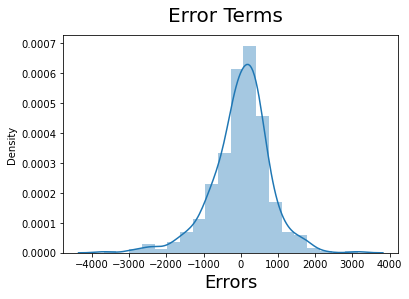

In [375]:
get_error_plot(y_train, y_train_pred)

In [376]:
r2_score(y_train, y_train_pred)

0.8419013441468863

## Predict on Test Data

In [377]:
# Scale test data as per previously created scaler object.
num_vars = ["temp", "atemp", "hum", "windspeed"]
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow,Mist,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednusday
585,1,0,1,0.876964,0.809465,0.517059,0.349214,7286,0,0,...,0,0,0,0,0,0,0,1,0,0
491,1,0,1,0.586554,0.577183,0.578824,0.578209,6273,0,1,...,1,0,0,0,1,0,0,0,0,0
291,0,0,1,0.592193,0.559268,0.905012,0.616931,2424,1,0,...,0,0,1,0,0,0,0,0,0,1
156,0,0,1,0.773879,0.704823,0.488235,0.244249,4548,0,0,...,0,0,0,0,1,0,0,0,0,0
453,1,0,1,0.363759,0.372993,0.461176,0.293875,5459,0,1,...,0,0,0,0,0,0,0,0,0,0


In [378]:
y_test = df_test.pop('cnt')
X_test = df_test

In [379]:
# Pick columns which were selected as part of final model.
X_test_new = df_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [380]:
X_test_new.head()

,const,yr,holiday,temp,hum,windspeed,Light Snow,spring,winter,May,Sept
585,1.0,1,0,0.876964,0.517059,0.349214,0,0,0,0,0
491,1.0,1,0,0.586554,0.578824,0.578209,0,0,0,1,0
291,1.0,0,0,0.592193,0.905012,0.616931,1,0,1,0,0
156,1.0,0,0,0.773879,0.488235,0.244249,0,0,0,0,0
453,1.0,1,0,0.363759,0.461176,0.293875,0,0,0,0,0


In [381]:
# Making predictions
y_pred = lm.predict(X_test_new)

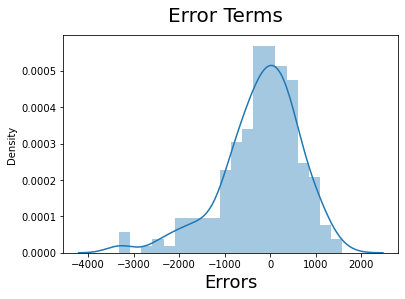

In [383]:
get_error_plot(y_test, y_pred)

In [382]:
r2_score(y_test, y_pred)

0.7754073808507798